In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from PIL import Image
from io import BytesIO

In [5]:
ms = [Chem.MolFromSmiles(Chem.MolToSmiles(x)) for x in Chem.ForwardSDMolSupplier('80-selected-cqr-conf.sdf') if x is not None]

In [6]:
patt = Chem.MolFromSmarts('c1cccnc1O')
fms = [x for x in ms if x.HasSubstructMatch(patt)]
len(fms)

255

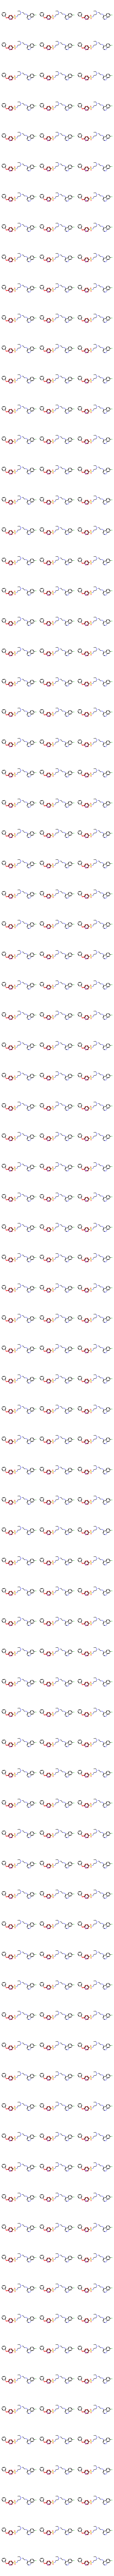

In [7]:
hats = []
hbnds = []
for m in fms:
    ats = m.GetSubstructMatch(patt)
    hats.append(ats)
    bnds = []
    for bnd in m.GetBonds():
        if bnd.GetBeginAtomIdx() in ats and bnd.GetEndAtomIdx() in ats:
            bnds.append(bnd.GetIdx())
    hbnds.append(bnds)

molsPerRow = 3
nRows = len(fms)//molsPerRow
if len(fms)%molsPerRow:
    nRows+=1
panelx = 250
panely = 200
canvasx = panelx * molsPerRow
canvasy = panely * nRows
drawer = rdMolDraw2D.MolDraw2DCairo(canvasx,canvasy,panelx,panely)
drawer.DrawMolecules(fms,highlightAtoms=hats,highlightBonds=hbnds)
drawer.FinishDrawing()
bio = BytesIO(drawer.GetDrawingText())
Image.open(bio)

In [8]:
hats = []
hbnds = []
for m in fms:
    ats = m.GetSubstructMatch(patt)
    hats.append(ats)

molsPerRow = 3
nRows = len(fms)//molsPerRow
if len(fms)%molsPerRow:
    nRows+=1
panelx = 250
panely = 200
canvasx = panelx * molsPerRow
canvasy = panely * nRows
drawer = rdMolDraw2D.MolDraw2DSVG(canvasx,canvasy,panelx,panely)
drawer.DrawMolecules(fms,highlightAtoms=hats)
drawer.FinishDrawing()
txt = drawer.GetDrawingText()
SVG(txt.replace('svg:',''))